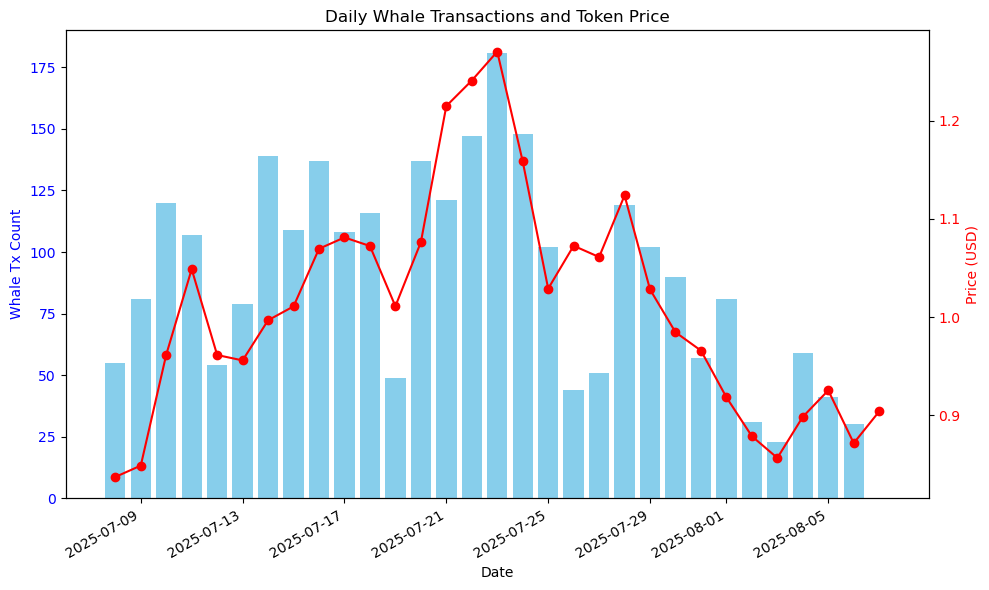

In [22]:
import matplotlib.pyplot as plt
from joblib import load


# Load merged data
df = load("C:/Users/DELL/Documents/Data Science and Analytics/Mini Capstone/minic/Database/merged_wif_data.joblib")


fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for whale_tx_count
ax1.bar(df['date'], df['whale_tx_count'], color='skyblue', label='Whale Tx Count')
ax1.set_xlabel('Date')
ax1.set_ylabel('Whale Tx Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(df['date'], df['price'], color='red', marker='o', label='Price')
ax2.set_ylabel('Price (USD)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Titles and layout
plt.title('Daily Whale Transactions and Token Price')
fig.autofmt_xdate()
fig.tight_layout()
plt.show()

### Insight:

- Whale activity appears to lead or coincide with price direction, especially during volatile moves.
- When whales withdraw (less activity), price tends to flatten or decline.
- When whales surge in, price often follows up, confirming whales as market movers.

This supports using whale behavior as a potential indicator for forecasting price trends.

### Correlation Matrix and Price Change Analysis

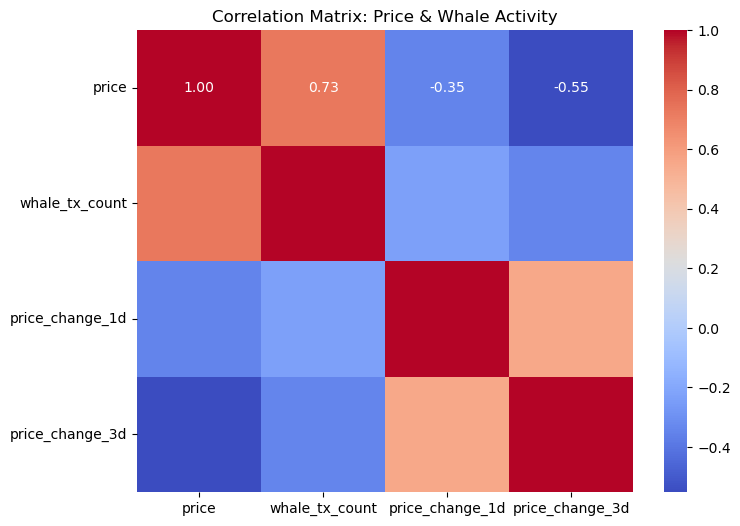

In [20]:
import seaborn as sns

# Calculate 1-day and 3-day price changes
df['price_change_1d'] = df['price'].shift(-1) - df['price']
df['price_change_3d'] = df['price'].shift(-3) - df['price']

# Drop rows with NaNs due to shifting
df_clean = df.dropna(subset=['price_change_1d', 'price_change_3d'])

# Correlation matrix
corr = df_clean[['price', 'whale_tx_count', 'price_change_1d', 'price_change_3d']].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Price & Whale Activity')
plt.show()


#### Insight: 

From the Correlation Matrix above, there is a strong correlation **(0.73)** between daily `price` and `whale tx count` which supports the idea that whale activity and price levels move together.

It shows that whale transactions are strongly correlated with $WIF's price level, but not necessarily with short-term price changes. This means that whales might not cause immediate volatility, but their presence is related to sustained price levels.

Also, the moderate correlation with `1-day` and `3-day` price changes suggests that spikes in whale tx activity may precede price changes, especially in the short term.


### Price Change Distribution

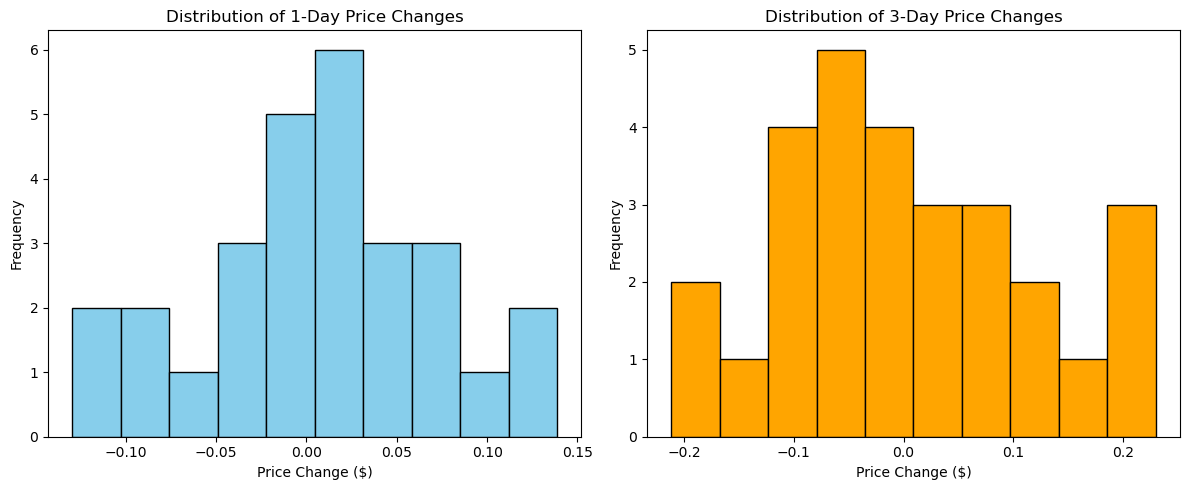

In [24]:
# Histogram of price changes (1d and 3d)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df_clean['price_change_1d'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of 1-Day Price Changes')
plt.xlabel('Price Change ($)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df_clean['price_change_3d'], bins=10, color='orange', edgecolor='black')
plt.title('Distribution of 3-Day Price Changes')
plt.xlabel('Price Change ($)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Insight:


From the histograms, volatility increases with time horizon: 3-day changes show greater dispersion than 1-day changes, which is typical for financial assets. Also, both distributions are centered around zero, suggesting no consistent directional bias over these time periods. Lastly,large price changes (beyond ±$0.10) are relatively rare, occurring in the tails of both distributions

> **Summary:** </br>
This analysis suggests $WIF exhibits typical cryptocurrency volatility patterns with most price movements being relatively small, but with occasional significant moves that create the wider tails in the distribution. 


So to answer the goal of this project : *Analyze whether spikes in whale activity (large transfers) precede or correlate with significant price movements of a selected token.*

The answer is **Yes**, whale activity correlates strongly with $WIF price movements, and in some cases, precedes them.